In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, f1_score

###Question 1

In [21]:
source_data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

df = pd.read_csv(source_data)
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [22]:
def data_preparation(df):
    df_filter = df[["Make",
                    "Model",
                    "Year",
                    "Engine HP",
                    "Engine Cylinders",
                    "Transmission Type",
                    "Vehicle Style",
                    "highway MPG",
                    "city mpg",
                    "MSRP"
                  ]].copy()

    df_filter.columns = df_filter.columns.str.replace(' ', '_').str.lower()

    df_filter.fillna(0, inplace=True)

    df_filter.rename(columns={'msrp': 'price'}, inplace=True)

    average_price = df_filter['price'].mean()

    df_filter['above_average'] = (df_filter['price'] > average_price).astype(int)

    return df_filter

df_cleaned = data_preparation(df)

In [23]:
df_full_train, df_test = train_test_split(df_cleaned, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 1

In [24]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train = pd.DataFrame(X_train, columns=dv.get_feature_names_out())

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
auc_scores = {}

for var in [i for i in X_train.select_dtypes(include='number') if i !='price']:
    auc = roc_auc_score(y_train, X_train[var])

    if auc < 0.5:
        auc = roc_auc_score(y_train, -X_train[var])

    auc_scores[var] = auc

best_variable = max(auc_scores, key=auc_scores.get)

print("AUC Scores:")
for var, auc in auc_scores.items():
    print(f"{var} : {auc:.2f}")

print(f"\nThe numerical variable with the highest AUC is {best_variable} with an AUC of {auc_scores[best_variable]:.2f}")

AUC Scores:
city_mpg : 0.67
engine_cylinders : 0.77
engine_hp : 0.92
highway_mpg : 0.63
make=Acura : 0.51
make=Alfa Romeo : 0.50
make=Aston Martin : 0.52
make=Audi : 0.53
make=BMW : 0.54
make=Bentley : 0.51
make=Bugatti : 0.50
make=Buick : 0.51
make=Cadillac : 0.55
make=Chevrolet : 0.52
make=Chrysler : 0.51
make=Dodge : 0.53
make=FIAT : 0.50
make=Ferrari : 0.51
make=Ford : 0.52
make=GMC : 0.51
make=Genesis : 0.50
make=HUMMER : 0.50
make=Honda : 0.52
make=Hyundai : 0.52
make=Infiniti : 0.52
make=Kia : 0.51
make=Lamborghini : 0.51
make=Land Rover : 0.52
make=Lexus : 0.51
make=Lincoln : 0.51
make=Lotus : 0.50
make=Maserati : 0.51
make=Maybach : 0.50
make=Mazda : 0.52
make=McLaren : 0.50
make=Mercedes-Benz : 0.53
make=Mitsubishi : 0.51
make=Nissan : 0.51
make=Oldsmobile : 0.51
make=Plymouth : 0.51
make=Pontiac : 0.51
make=Porsche : 0.52
make=Rolls-Royce : 0.50
make=Saab : 0.50
make=Scion : 0.50
make=Spyker : 0.50
make=Subaru : 0.51
make=Suzuki : 0.52
make=Tesla : 0.50
make=Toyota : 0.52
ma

In [26]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9987410826689047

### Question 2

In [27]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
roc_auc = round(roc_auc_score(y_val, y_val_pred), 3)

print(f"Accuracy on the validation dataset: {roc_auc*100:.3f} %")

Accuracy on the validation dataset: 99.600 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Question 2 & 3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


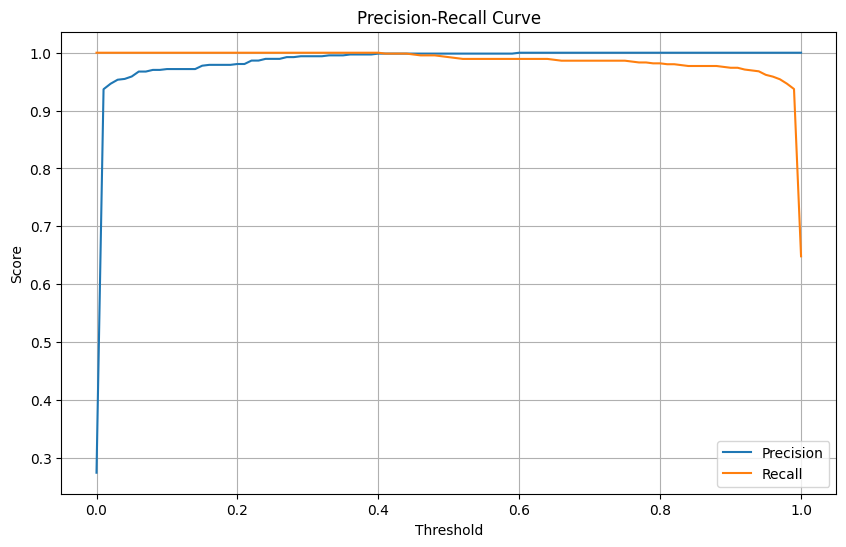

The precision and recall curves intersect at threshold: 0.41
The F1 score is maximal at threshold: 0.4
The maximal F1 score is: 1.00


In [28]:
predicted_probabilities = model.predict_proba(X_val)[:, 1]

true_labels = y_val

precisions = []
recalls = []
f1_scores = []

thresholds = np.arange(0, 1.01, 0.01)

for threshold in thresholds:
    predicted_labels = (predicted_probabilities >= threshold).astype(int)
    precision = precision_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.title('Precision-Recall Curve')
plt.show()

intersection_threshold = thresholds[np.argmax(np.array(precisions) == np.array(recalls))]
max_f1_threshold = thresholds[np.argmax(f1_scores)]
max_f1_score = max(f1_scores)
print(f"The precision and recall curves intersect at threshold: {intersection_threshold:.2f}")
print(f"The F1 score is maximal at threshold: {max_f1_threshold}")
print(f"The maximal F1 score is: {max_f1_score:.2f}")

### Question 5

In [29]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

for train_index, val_index in kf.split(df_full_train):
    train_data, val_data = df_full_train.iloc[train_index], df_full_train.iloc[val_index]

    X_train, y_train = train_data.drop(columns=['above_average']), train_data['above_average']
    X_val, y_val = val_data.drop(columns=['above_average']), val_data['above_average']

    dv = DictVectorizer(sparse=False)

    train_dict = X_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = X_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model.fit(X_train, y_train)

    val_probabilities = model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, val_probabilities)

    auc_scores.append(auc)

std_deviation_auc = np.std(auc_scores)

print(f"Standard Deviation of AUC Scores Across 5 Folds: {std_deviation_auc:.9f}")

Standard Deviation of AUC Scores Across 5 Folds: 0.000002934


### Question 6

In [33]:
C_values = [0.01, 0.1, 0.5, 10]
solver = 'liblinear'
max_iter = 1000
kf = KFold(n_splits=5, random_state=42, shuffle=True)

results = []

for C in C_values:
    model = LogisticRegression(solver=solver, C=C, max_iter=max_iter)
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    mean_score = round(np.mean(scores), 3)
    std_dev = round(np.std(scores), 3)
    results.append((C, mean_score, std_dev))

results.sort(key=lambda x: x[1], reverse=True)
best_C, best_mean_score, best_std_dev = results[0]

print(f"Best C: {best_C}")
print(f"Best Mean Score: {best_mean_score}")
print(f"Standard Deviation for Best C: {best_std_dev}")


Best C: 0.01
Best Mean Score: 0.999
Standard Deviation for Best C: 0.001
